## Name : Ezekiel Dong
## Topic : MW+M31 Stellar Major Merger Remnant: Stellar disk particle distribution/morphology.
Question: What is the distribution of stellar particles from M31 vs the MW? Are the profiles different?
For this topic, I intend to make a plot that plots the Stellar density profile and sersic profile
of the merger remnant as a function of radius. For this plot, lab 6 provides 
a lot of guidance, but for this research project the mass profile and stellar 
density profile needs to be computed in shells rather than the whole bulge. 

In [52]:
# Load Modules
import numpy as np
import astropy.units as u

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
from MassProfile import MassProfile
from GalaxyMass import ComponentMass

In [53]:
class CenterOfMass:
# Class to define COM position and velocity properties of a given galaxy 
# and simulation snapshot

    def __init__(self, filename, ptype):
        ''' Class to calculate the 6-D phase-space position of a galaxy's center of mass using
        a specified particle type. 
            
            PARAMETERS
            ----------
            filename : `str`
                snapshot file
            ptype : `int; 1, 2, or 3`
                particle type to use for COM calculations
        '''
     
        # read data in the given file using Read
        self.time, self.total, self.data = Read(filename)                                                                                             

        #create an array to store indexes of particles of desired Ptype                                
        self.index = np.where(self.data['type'] == ptype)

        # store the mass, positions, velocities of only the particles of the given type
        # the following only gives the example of storing the mass
        self.m = self.data['m'][self.index]
        # write your own code to complete this for positions and velocities
        self.x = self.data['x'][self.index]
        self.y = self.data['y'][self.index]
        self.z = self.data['z'][self.index]
        self.vx = self.data['vx'][self.index]
        self.vy = self.data['vy'][self.index]
        self.vz = self.data['vz'][self.index]


    def COMdefine(self,a,b,c,m):
        ''' Method to compute the COM of a generic vector quantity by direct weighted averaging.
        
        PARAMETERS
        ----------
        a : `float or np.ndarray of floats`
            first vector component
        b : `float or np.ndarray of floats`
            second vector component
        c : `float or np.ndarray of floats`
            third vector component
        m : `float or np.ndarray of floats`
            particle masses
        
        RETURNS
        -------
        a_com : `float`
            first component on the COM vector
        b_com : `float`
            second component on the COM vector
        c_com : `float`
            third component on the COM vector
        '''
        # write your own code to compute the generic COM 
        #using Eq. 1 in the homework instructions
        # xcomponent Center of mass
        a_com = np.sum(a*m)/np.sum(m)
        # ycomponent Center of mass
        b_com = np.sum(b*m)/np.sum(m)
        # zcomponent Center of mass
        c_com = np.sum(c*m)/np.sum(m)
        
        # return the 3 components separately
        return a_com, b_com, c_com
    
    
    def COM_P(self, delta):
        '''Method to compute the position of the center of mass of the galaxy 
        using the shrinking-sphere method.

        PARAMETERS
        ----------
        delta : `float`
            error tolerance in kpc. 
        
        RETURNS
        ----------
        p_COM : `np.ndarray of astropy.Quantity'
            3-D position of the center of mass in kpc
        '''                                                                     

        # Center of Mass Position                                                                                      
        ###########################                                                                                    

        # Try a first guess at the COM position by calling COMdefine                                                   
        x_COM, y_COM, z_COM = self.COMdefine(self.x, self.y, self.z, self.m)
        # compute the magnitude of the COM position vector.
        # write your own code below
        r_COM = np.sqrt(x_COM**2 + y_COM**2 + z_COM**2)


        # iterative process to determine the center of mass                                                            

        # change reference frame to COM frame                                                                          
        # compute the difference between particle coordinates                                                          
        # and the first guess at COM position
        # write your own code below
        x_new = self.x - x_COM
        y_new = self.y - y_COM
        z_new = self.z - z_COM
        r_new = np.sqrt(x_new**2.0 + y_new**2.0 +z_new**2.0)

        # find the max 3D distance of all particles from the guessed COM                                               
        # will re-start at half that radius (reduced radius)                                                           
        r_max = max(r_new)/2.0
        
        # pick an initial value for the change in COM position                                                      
        # between the first guess above and the new one computed from half that volume
        # it should be larger than the input tolerance (delta) initially
        change = 1000.0

        # start iterative process to determine center of mass position                                                 
        # delta is the tolerance for the difference in the old COM and the new one.    
        
        while (change > delta):
            # select all particles within the reduced radius (starting from original x,y,z, m)
            # write your own code below (hints, use np.where)
            index2 = np.where(r_new < r_max)
            x2 = self.x[index2]
            y2 = self.y[index2]
            z2 = self.z[index2]
            m2 = self.m[index2]
          

            # Refined COM position:                                                                                    
            # compute the center of mass position using                                                                
            # the particles in the reduced radius
            # write your own code below
            x_COM2, y_COM2, z_COM2 = self.COMdefine(x2,y2,z2,m2)
            
            # compute the new 3D COM position
            # write your own code below
            r_COM2 = np.sqrt(x_COM2**2 + y_COM2**2 + z_COM2**2) 

            # determine the difference between the previous center of mass position                                    
            # and the new one.                                                                                         
            change = np.abs(r_COM - r_COM2)
            # uncomment the following line if you want to check this                                                                                               
            # print ("CHANGE = ", CHANGE)                                                                                     

            # Before loop continues, reset : r_max, particle separations and COM                                        

            # reduce the volume by a factor of 2 again                                                                 
            r_max /= 2.0
            # check this.                                                                                              
            #print ("maxR", r_max)                                                                                      

            # Change the frame of reference to the newly computed COM.                                                 
            # subtract the new COM
            # write your own code below
            x_new = self.x - x_COM2
            y_new = self.y - y_COM2
            z_new = self.z - z_COM2
            r_new = np.sqrt(x_new**2 + y_new**2 + z_new**2)
          

            # set the center of mass positions to the refined values                                                   
            x_COM = x_COM2
            y_COM = y_COM2
            z_COM = z_COM2
            r_COM = r_COM2

            # create an array  to store the COM position                                                                                                                                                       
            p_COM = np.array([x_COM, y_COM, z_COM])

        # set the correct units using astropy and round all values
        # and then return the COM positon vector
        # write your own code below
        return np.around(p_COM, 2)*u.kpc
        
        
    def COM_V(self, x_COM, y_COM, z_COM):
        ''' Method to compute the center of mass velocity based on the center of mass
        position.

        PARAMETERS
        ----------
        x_COM : 'astropy quantity'
            The x component of the center of mass in kpc
        y_COM : 'astropy quantity'
            The y component of the center of mass in kpc
        z_COM : 'astropy quantity'
            The z component of the center of mass in kpc
            
        RETURNS
        -------
        v_COM : `np.ndarray of astropy.Quantity'
            3-D velocity of the center of mass in km/s
        '''
        
        # the max distance from the center that we will use to determine 
        #the center of mass velocity                   
        rv_max = 15.0*u.kpc

        # determine the position of all particles 
        # relative to the center of mass position (x_COM, y_COM, z_COM)
        # write your own code below
        xV = self.x[:]*u.kpc - x_COM
        yV = self.y[:]*u.kpc - y_COM
        zV = self.z[:]*u.kpc - z_COM
        rV = np.sqrt(xV**2 + yV**2 + zV**2)
        
        # determine the index for those particles within the max radius
        # write your own code below
        indexV = np.where(rV < rv_max)
        
        # determine the velocity and mass of those particles within the mas radius
        # write your own code below
        vx_new = self.vx[indexV]
        vy_new = self.vy[indexV]
        vz_new = self.vz[indexV]
        m_new =  self.m[indexV]
       
        
        # compute the center of mass velocity using those particles
        # write your own code below
        vx_COM, vy_COM, vz_COM =   self.COMdefine(vx_new,vy_new,vz_new, m_new)
        
        # create an array to store the COM velocity
        # write your own code below
        v_COM = np.array([vx_COM,vy_COM,vz_COM])

        # return the COM vector
        # set the correct units using astropy
        # round all values
        return np.round(v_COM, 2)*u.km/u.s

In [54]:
def sersicE(r, re, n, mtot):
    """ Function that computes the Sersic Profile for an Elliptical 
    System, assuming M/L ~ 1
    PARMETERS
    ---------
        r: `float`
            Distance from the center of the galaxy (kpc)
        re: `float`
            The Effective radius (2D radius that contains 
            half the light) (kpc)
        n:  `float`
            sersic index
        mtot: `float`
            the total stellar mass (Msun)

    RETURNS
    -------
        I: `array of floats`
            the surface brightness profile of the elliptical in Lsun/kpc^2

    """

    # We are assuming M/L = 1, so the total luminosity is:
    lum = mtot
    
    # the effective surface brightness is
    Ie = lum/7.2/np.pi/re**2
    
    # Break down the equation 
    a = (r/re)**(1.0/n)
    b = -7.67*(a-1)
    
    # The surface brightness
    #I = Ie*np.exp(-7.67*((r/re)**(1.0/n)-1.0))
    I = Ie*np.exp(b)
    
    return I
    

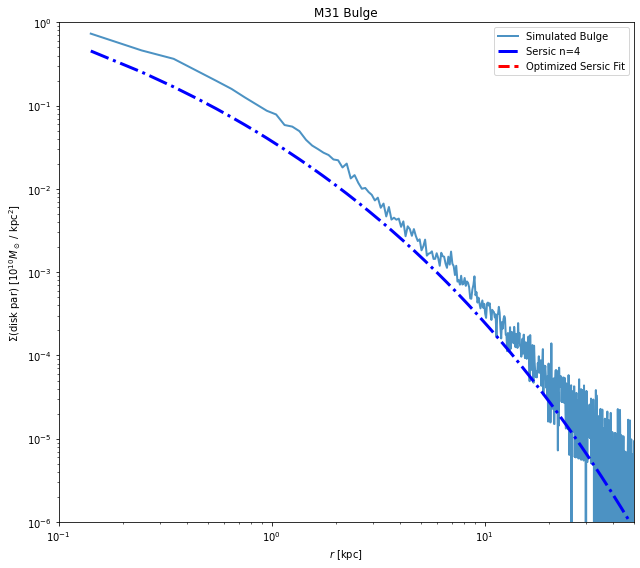

In [18]:
# Create a center of mass object 
# This lets us store the x, y, z, bulge particles 
M31_COM = CenterOfMass("M31_000.txt", 3)
M31_COM_p = M31_COM.COM_P(0.1)
x = M31_COM.x-M31_COM_p[0].value
y = M31_COM.y-M31_COM_p[1].value
z = M31_COM.z-M31_COM_p[2].value
m = M31_COM.m

print(x[0],y[0],z[0])


-9.135999999999967 -1.4250000000000682 4.2760000000000105


In [46]:
MW_COM = CenterOfMass("MW_000.txt", 3)
MW_COM_p = MW_COM.COM_P(0.1)
x = MW_COM.x-MW_COM_p[0].value
y = MW_COM.y-MW_COM_p[1].value
z = MW_COM.z-MW_COM_p[2].value
m = MW_COM.m
print(x[0],y[0],z[0])


-0.87222 -1.34268 -0.09746999999999995


In [56]:
M33_COM = CenterOfMass("M33_000.txt", 3)
M33_COM_p = M33_COM.COM_P(0.1)
x = M33_COM.x-M33_COM_p[0].value
y = M33_COM.y-M33_COM_p[1].value
z = M33_COM.z-M33_COM_p[2].value
m = M33_COM.m

print(x[0],y[0],z[0])

<ipython-input-53-3a3c655406b4>:61: RuntimeWarning: invalid value encountered in double_scalars
  a_com = np.sum(a*m)/np.sum(m)
<ipython-input-53-3a3c655406b4>:63: RuntimeWarning: invalid value encountered in double_scalars
  b_com = np.sum(b*m)/np.sum(m)
<ipython-input-53-3a3c655406b4>:65: RuntimeWarning: invalid value encountered in double_scalars
  c_com = np.sum(c*m)/np.sum(m)


ValueError: max() arg is an empty sequence

In [47]:
re_bulge = 2.0  # Example value for the effective radius (re), adjust as needed
bulge_total = 1e10  # Example value for the total stellar mass (mtot), adjust as needed

In [48]:
# Compute the surface density profile 

# calculate the radial distances in cylindrical coordinates (and theta, too)
cyl_r_mag = np.sqrt(x**2 + y**2) #np.sum(self.alg_r[:, :2]**2, axis=1))
cyl_theta = np.arctan2(y,x) # self.alg_r[:, 1], self.alg_r[:, 0])

radii = np.arange(0.1, 0.95 * cyl_r_mag.max(), 0.1)
       
# create the mask to select particles for each radius
# np.newaxis creates a virtual axis to make tmp_r_mag 2 dimensional
# so that all radii can be compared simultaneously
enc_mask = cyl_r_mag[:, np.newaxis] < np.asarray(radii).flatten()

# calculate the enclosed masses 
# relevant particles will be selected by enc_mask (i.e., *1)
# outer particles will be ignored (i.e., *0)
m_enc = np.sum(m[:, np.newaxis] * enc_mask, axis=0)

# use the difference between nearby elements to get mass in each annulus
m_annuli = np.diff(m_enc) # one element less then m_enc
Sigma = m_annuli / (np.pi * (radii[1:]**2 - radii[:-1]**2))

r_annuli = np.sqrt(radii[1:] * radii[:-1]) 
# here we choose the geometric mean

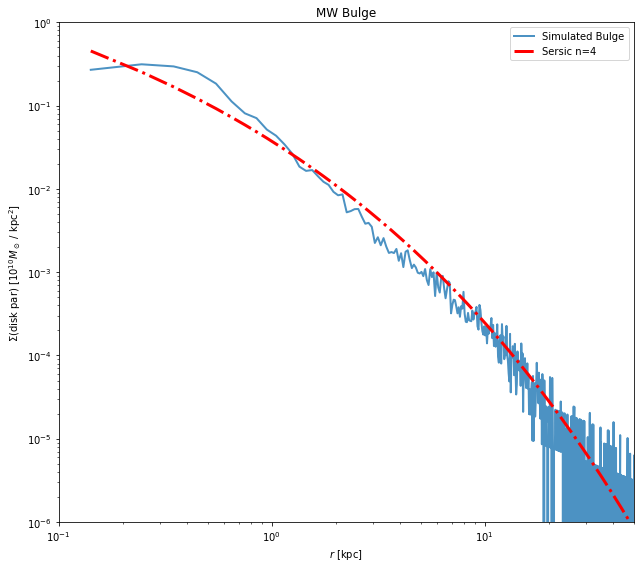

In [50]:
fig, ax = plt.subplots(figsize=(9, 8))

# Surface Density Profile
ax.loglog(r_annuli, Sigma, lw=2, alpha=0.8,label='Simulated Bulge')

# YOU ADD HERE: Sersic fit to the surface brightness Sersic fit
# Sersic n = 4 - de Vaucouleurs
plt.semilogy(r_annuli,sersicE(r_annuli,re_bulge,4,bulge_total)/1e10, color='red',
             linestyle="-.",linewidth=3, label='Sersic n=4')

ax.set(xlabel=r"$r$ [kpc]", ylabel=r"$\Sigma$(disk par) [$10^{10} M_\odot$ / kpc$^2$]", title="MW Bulge")

#set axis limits
plt.xlim(0.1,50)
plt.ylim(1e-6,1)

ax.legend(loc='best')
fig.tight_layout()

#plt.savefig('Lab6.png')

<ipython-input-14-3a3c655406b4>:61: RuntimeWarning: invalid value encountered in double_scalars
  a_com = np.sum(a*m)/np.sum(m)
<ipython-input-14-3a3c655406b4>:63: RuntimeWarning: invalid value encountered in double_scalars
  b_com = np.sum(b*m)/np.sum(m)
<ipython-input-14-3a3c655406b4>:65: RuntimeWarning: invalid value encountered in double_scalars
  c_com = np.sum(c*m)/np.sum(m)


ValueError: max() arg is an empty sequence

SyntaxError: EOL while scanning string literal (<ipython-input-41-4756263f3a4f>, line 7)

In [ ]:
snap_number_M31 = 800
snap_number_MW = 800

tm = TotalMass(snap_number_M31, snap_number_MW)

ptype = 2  # Use ptype = 2 for the stellar distribution

tm.plot_stellar_distribution(ptype)
tm.plot_merger_remnant(ptype)

In [ ]:
# Your measured radius and density values
radius_values = np.linspace(r_0, r_f, n)
density_values = tm.Massenclosed(ptype, r_0, r_f, n)

# Exclude the first element (radius = 0) to avoid divide by zero error
radius_values_no_zero = radius_values[1:]
density_values_no_zero = density_values[1:]

# Provide initial guesses for I_e, r_e, and n
initial_guess = [1e10, 5, 4]

# Fit the Sersic profile to the data
params_opt, params_cov = curve_fit(sersic_profile, radius_values_no_zero, density_values_no_zero, p0=initial_guess)

I_e_opt, r_e_opt, n_opt = params_opt

# Calculate the Sersic profile with the optimal parameters
sersic_fit = sersic_profile(radius_values, I_e_opt, r_e_opt, n_opt)

plt.plot(radius_values, density_values, label='Measured Density Profile')
plt.plot(radius_values, sersic_fit, label='Sersic Profile Fit')
plt.xlabel('Radius (kpc)')
plt.ylabel('Density (M_sun / kpc^3)')
plt.legend()
plt.show()
